## CHURN PREDICTION

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('telco-customer-churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
cat_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
for c in cat_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df.totalcharges = df.totalcharges.fillna(0)

In [12]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df['churn'] = (df.churn == 'yes').astype(int)

## Sklearn Split Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
len(df_full_train), len(df_test)

(5634, 1409)

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
len(y_train), len(y_val), len(y_test)

(4225, 1409, 1409)

In [21]:
del(df_train['churn'])
del(df_val['churn'])
del(df_test['churn'])

In [22]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

## Exploratory Data Analysis

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.734469
1    0.265531
Name: proportion, dtype: float64

In [26]:
churn_rate = df_full_train.churn.mean()
print(churn_rate)

0.2655307064252751


In [27]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [28]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
num_features = ['tenure', 'monthlycharges', 'totalcharges']

In [30]:
cat_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
df_full_train[cat_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance

In [32]:
df_full_train.churn.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       1
4       0
       ..
5629    1
5630    0
5631    0
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64>

In [33]:
global_churn = df_full_train.churn.mean()
print(global_churn)

0.2655307064252751


In [34]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes'].churn.mean()
churn_partner

np.float64(0.20073260073260074)

In [35]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no'].churn.mean()
churn_no_partner

np.float64(0.32644628099173556)

In [36]:
'''
Difference > 0, customers are less likely to churn
Difference < 0 customers are likely to churn
'''

'\nDifference > 0, customers are less likely to churn\nDifference < 0 customers are likely to churn\n'

In [37]:
difference_partner = global_churn - churn_partner
difference_partner

np.float64(0.06479810569267436)

In [38]:
difference_no_partner = global_churn - churn_no_partner
difference_no_partner

np.float64(-0.06091557456646046)

In [39]:
'''
Risk Ratio > 1, customers are likely to churn
Risk Ratio < 1, customers are less likely to churn
'''

'\nRisk Ratio > 1, customers are likely to churn\nRisk Ratio < 1, customers are less likely to churn\n'

In [40]:
risk_ratio_partner = churn_partner / global_churn
risk_ratio_partner

np.float64(0.7559675618499149)

In [41]:
risk_ratio_no_partner = churn_no_partner / global_churn
risk_ratio_no_partner

np.float64(1.2294106598311754)

In [42]:
from IPython.display import display

In [43]:
df_gender_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_gender_group['diff'] = df_gender_group['mean'] - global_churn
df_gender_group['risk'] = df_gender_group['mean'] / global_churn
df_gender_group

,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


In [44]:
for c in cat_features:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793




partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968




dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


## Feature Importance - Mutual Information

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0966515250997

In [47]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

6.877785208564413e-05

In [48]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [49]:
mi = df_full_train[cat_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
seniorcitizen       0.010059
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

## Feature Importance - Correlation

In [50]:
df_full_train[num_features].corrwith(df_full_train.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

In [51]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5863636363636363)

In [53]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.4064814814814815)

In [54]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17205957883923986)

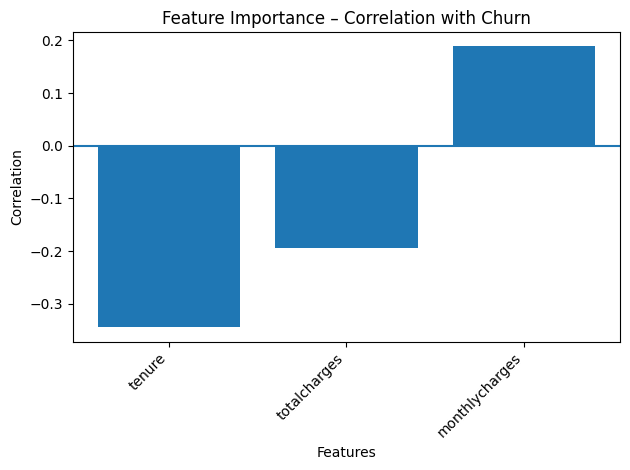

In [55]:
corrs = df_full_train[num_features].corrwith(df_full_train.churn)
corrs = corrs.sort_values()

plt.bar(corrs.index, corrs.values)
plt.axhline(0)  # reference line at 0
plt.title("Feature Importance – Correlation with Churn")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

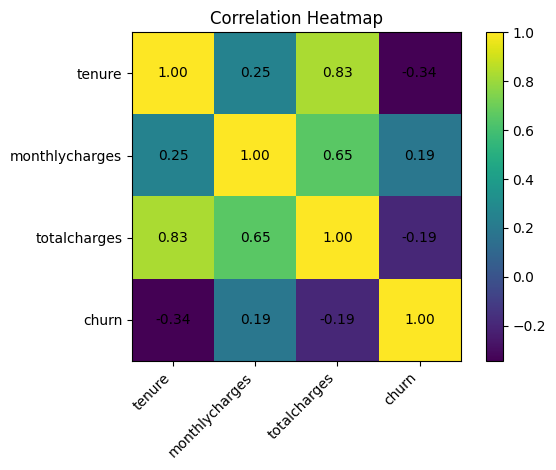

In [57]:
corr = df_full_train[num_features + ['churn']].corr()
corr_matrix = corr.values
labels = corr.columns

fig, ax = plt.subplots()

# Store the mappable
im = ax.imshow(corr_matrix)

# Set ticks and labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# annotate each cell
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f"{corr_matrix[i, j]:.2f}",
                ha="center", va="center")

plt.title("Correlation Heatmap")

# Pass the stored mappable here
fig.colorbar(im)

plt.tight_layout()
plt.show()